# GridsearchCV (cross validation)

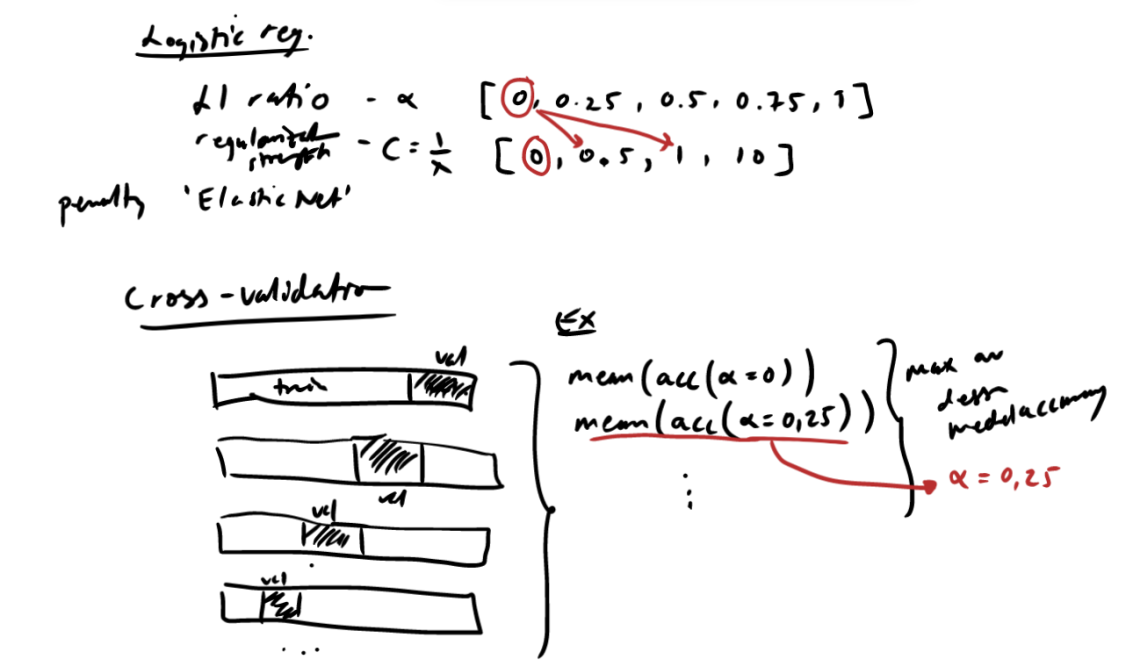
* inspelning L7.0 GridsearchCV

In [3]:
import pandas as pd
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import numpy as np

wine = load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [7]:
df = pd.DataFrame(wine.data, columns = wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [8]:
wine.target
## wine.target är en numpy array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

## Train|Test split

In [20]:
from sklearn.model_selection import train_test_split

X, y = wine.data, wine.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((89, 13), (89, 13), (89,), (89,))

## PipeLine & gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


scaler = StandardScaler()

# constructing different pipelines for different models
pipe_KNN = Pipeline([("scaler", scaler), ("knn", KNeighborsClassifier())])

# solver är olika typer av numeriska metoder för att lösa ett optimeringsproblem
# logistic regression använder sig av MLE (maximum likeliohood estimation)
# med hjälp av detta kan man få ut ol9ika typer av loss funktioner, ex cross entropy (vi vill minimera felet på detta)

pipe_logistic = Pipeline(
    [
        ("scaler", scaler),
        (
            "log",
            LogisticRegression(
                penalty="elasticnet", solver="saga", multiclass="auto", max_iter=10000
            ),
        ),
    ]
)

# specify parameters to tune
# knn; namnet givet i pipe_KNN. Två st underscore (__); den parametern den skall tunea. Ska ge parametern en lista av värden. 
param_grid_KNN = {"knn__n_neighbors": list(range(1,50))} # kommer köra igenom 1-50 och se vilken som ger bäst score.

param_grid_logistic = {"log__l1_ratio": np.linspace(0, 1, 20)}



